In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Grayscale histograms
cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

(array([[21., 35., 27., ...,  0.,  0.,  0.],
        [21., 33., 29., ...,  0.,  0.,  0.],
        [17., 34., 29., ...,  1.,  0.,  0.],
        ...,
        [ 5., 37., 21., ..., 10., 36.,  0.],
        [ 4., 41., 17., ..., 10., 37.,  0.],
        [ 4., 45., 13., ...,  9., 37.,  0.]]),
 array([ 21. ,  42.9,  64.8,  86.7, 108.6, 130.5, 152.4, 174.3, 196.2,
        218.1, 240. ]),
 <a list of 220 BarContainer objects>)

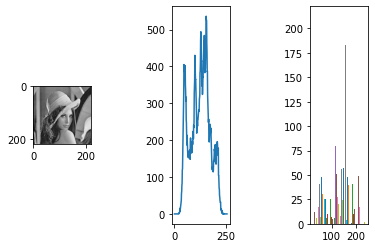

In [21]:
image = cv2.imread('data/lenna.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.subplot(1,5,1)
plt.imshow(gray_image,cmap='gray')
plt.subplot(1,5,3)
plt.plot(hist)
plt.subplot(1,5,5)
plt.hist(gray_image)




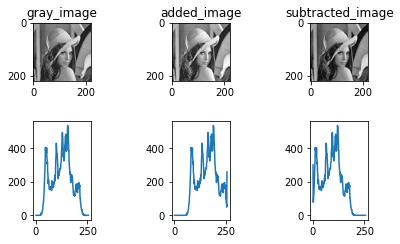

In [22]:
# Add 35 to every pixel on the grayscale image (the result will look lighter) and calculate histogram
M = np.ones(gray_image.shape, dtype="uint8") * 35
added_image = cv2.add(gray_image, M)
hist_added_image = cv2.calcHist([added_image], [0], None, [256], [0, 256])
# Subtract 35 from every pixel (the result will look darker) and calculate histogram
subtracted_image = cv2.subtract(gray_image, M)
hist_subtracted_image = cv2.calcHist([subtracted_image], [0], None, [256], [0, 256])
plt.subplot(2,5,1)
plt.imshow(gray_image,cmap='gray')
plt.title('gray_image')
plt.subplot(2,5,3)
plt.imshow(added_image,cmap='gray')
plt.title('added_image')
plt.subplot(2,5,5)
plt.imshow(subtracted_image,cmap='gray')
plt.title('subtracted_image')
plt.subplot(2,5,6)
plt.plot(hist)
plt.subplot(2,5,8)
plt.plot(hist_added_image)
plt.subplot(2,5,10)
plt.plot(hist_subtracted_image)

# Grayscale histograms with a mask

Text(0.5, 1.0, 'hist')

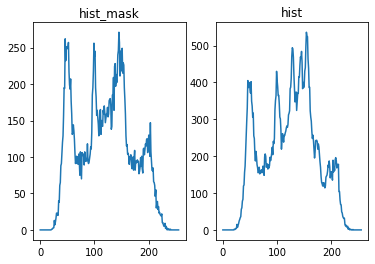

In [29]:
mask = np.zeros(gray_image.shape[:2], np.uint8)
mask[30:190, 30:190] = 255

hist_mask = cv2.calcHist([gray_image], [0], mask, [256], [0, 256])
plt.subplot(1,2,1)
plt.plot(hist_mask)
plt.title('hist_mask')
plt.subplot(1,2,2)
plt.plot(hist)
plt.title('hist')

# Color histograms

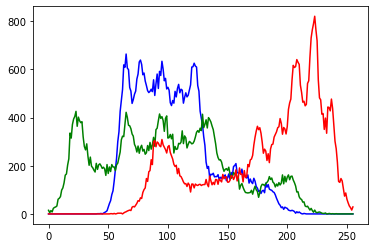

In [37]:
def hist_color_img(img):
#Calculates the histogram from a three-channel image
    histr = []
    histr.append(cv2.calcHist([img], [0], None, [256], [0, 256]))
    histr.append(cv2.calcHist([img], [1], None, [256], [0, 256]))
    histr.append(cv2.calcHist([img], [2], None, [256], [0, 256]))
    return histr
image = cv2.imread('data/lenna.png')
hist_color = hist_color_img(image)

plt.plot(hist_color[0],color='b')
plt.plot(hist_color[1],color='g')
plt.plot(hist_color[2],color='r')

(array([[ 6., 25., 24., ...,  1., 35.,  5.],
        [ 4., 22., 26., ...,  1., 34.,  5.],
        [ 1., 18., 29., ...,  1., 31.,  6.],
        ...,
        [ 1.,  9., 32., ..., 70., 11., 39.],
        [ 2., 11., 30., ..., 69., 17., 33.],
        [ 1.,  9., 35., ..., 67., 25., 31.]]),
 array([ 52. ,  72.3,  92.6, 112.9, 133.2, 153.5, 173.8, 194.1, 214.4,
        234.7, 255. ]),
 <a list of 220 BarContainer objects>)

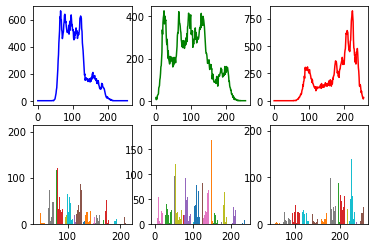

In [42]:
image = cv2.imread('data/lenna.png')
img_B=image[:,:,0]
img_G=image[:,:,1]
img_R=image[:,:,2]
plt.subplot(2,3,1)
plt.plot(hist_color[0],color='b')
plt.subplot(2,3,4)
plt.hist(img_B)
plt.subplot(2,3,2)
plt.plot(hist_color[1],color='g')
plt.subplot(2,3,5)
plt.hist(img_G)
plt.subplot(2,3,3)
plt.plot(hist_color[2],color='r')
plt.subplot(2,3,6)
plt.hist(img_R)

# Histogram equalization
The cv2.equalizeHist() function normalizes the brightness and
also increases the contrast of the image. Therefore, the histogram of the
image is modified after applying this function. In the next subsections, we
will explore both the original and the modified histogram in order to see how
it is changed.

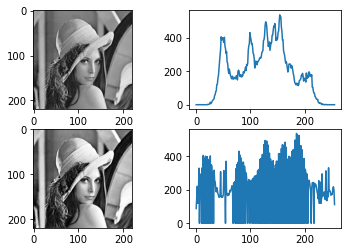

In [45]:
image = cv2.imread('data/lenna.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

gray_image_eq = cv2.equalizeHist(gray_image)
hist_eq = cv2.calcHist([gray_image_eq], [0], None, [256], [0, 256])

plt.subplot(2,2,1)
plt.imshow(gray_image,cmap='gray')
plt.subplot(2,2,2)
plt.plot(hist)
plt.subplot(2,2,3)
plt.imshow(gray_image_eq,cmap='gray')
plt.subplot(2,2,4)
plt.plot(hist_eq)

# Color histogram equalization
We have commented that equalizing the three channels is not a good
approach because the color shade changes dramatically.

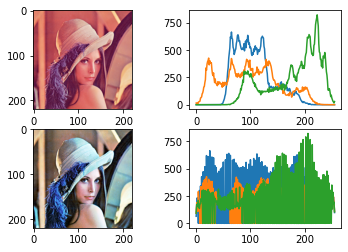

In [53]:
def equalize_hist_color(img):
#Equalize the image splitting the image applying cv2.equalizeHist() to each channel and merging
    channels = cv2.split(img)
    eq_channels = []
    for ch in channels:
        eq_channels.append(cv2.equalizeHist(ch))
    eq_image = cv2.merge(eq_channels)
    return eq_image

def hist_color_img(img):
#Calculates the histogram from a three-channel image
    histr = []
    histr.append(cv2.calcHist([img], [0], None, [256], [0, 256]))
    histr.append(cv2.calcHist([img], [1], None, [256], [0, 256]))
    histr.append(cv2.calcHist([img], [2], None, [256], [0, 256]))
    return histr

image = cv2.imread('data/lenna.png')

hist_color = hist_color_img(image)

eq_image=equalize_hist_color(image)

hist_color_eq= hist_color_img(eq_image) 

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
eq_image=cv2.cvtColor(eq_image, cv2.COLOR_BGR2RGB)
plt.subplot(2,2,1)
plt.imshow(image)
plt.subplot(2,2,2)
plt.plot(hist_color[0])
plt.plot(hist_color[1])
plt.plot(hist_color[2])

plt.subplot(2,2,3)
plt.imshow(eq_image)
plt.subplot(2,2,4)
plt.plot(hist_color_eq[0])
plt.plot(hist_color_eq[1])
plt.plot(hist_color_eq[2])

We have commented that equalizing the three channels is not a good approach
because the color shade changes dramatically.

A better approach is to convert the BGR image to a color space containing a
luminance/intensity channel (Yuv, Lab, HSV, and HSL). Then, we apply
histogram equalization only on the luminance channel and, finally, perform
inverse transformation, that is, we merge the channels and convert them back
to the BGR color space.

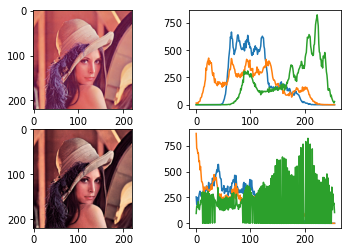

In [56]:
def equalize_hist_color_hsv(img):
# '''Equalize the image splitting the image after HSV conversion and applying cv2.equalizeHist()
#    to the V channel, merging the channels and convert back to the BGR color space'''
    H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
    eq_V = cv2.equalizeHist(V)
    eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2BGR)
    return eq_image

def hist_color_img(img):
#Calculates the histogram from a three-channel image
    histr = []
    histr.append(cv2.calcHist([img], [0], None, [256], [0, 256]))
    histr.append(cv2.calcHist([img], [1], None, [256], [0, 256]))
    histr.append(cv2.calcHist([img], [2], None, [256], [0, 256]))
    return histr

image = cv2.imread('data/lenna.png')

hist_color = hist_color_img(image)

eq_image=equalize_hist_color_hsv(image)

hist_color_eq= hist_color_img(eq_image) 

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
eq_image=cv2.cvtColor(eq_image, cv2.COLOR_BGR2RGB)
plt.subplot(2,2,1)
plt.imshow(image)
plt.subplot(2,2,2)
plt.plot(hist_color[0])
plt.plot(hist_color[1])
plt.plot(hist_color[2])

plt.subplot(2,2,3)
plt.imshow(eq_image)
plt.subplot(2,2,4)
plt.plot(hist_color_eq[0])
plt.plot(hist_color_eq[1])
plt.plot(hist_color_eq[2])



# Contrast Limited Adaptive Histogram Equalization

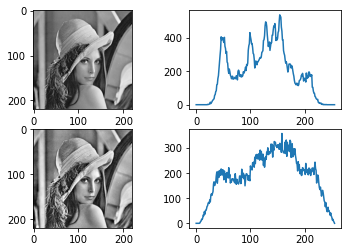

In [59]:
image = cv2.imread('data/lenna.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

clahe = cv2.createCLAHE(clipLimit=2.0)
#The first one is clipLimit, which sets the threshold for
#contrast limiting.
gray_image_clahe = clahe.apply(gray_image)
hist_clahe = cv2.calcHist([gray_image_clahe], [0], None, [256], [0, 256])

plt.subplot(2,2,1)
plt.imshow(gray_image,cmap='gray')
plt.subplot(2,2,2)
plt.plot(hist)
plt.subplot(2,2,3)
plt.imshow(gray_image_clahe,cmap='gray')
plt.subplot(2,2,4)
plt.plot(hist_clahe)

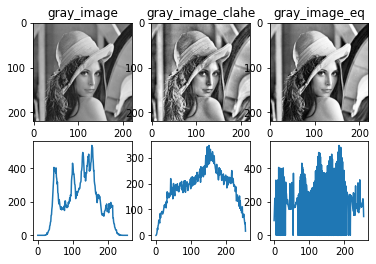

In [65]:
image = cv2.imread('data/lenna.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

#Histogram equalization
gray_image_eq = cv2.equalizeHist(gray_image)
hist_eq = cv2.calcHist([gray_image_eq], [0], None, [256], [0, 256])

#Contrast Limited Adaptive Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=4.0)
gray_image_clahe = clahe.apply(gray_image)
hist_clahe = cv2.calcHist([gray_image_clahe], [0], None, [256], [0, 256])

# ploting
plt.subplot(2,3,1)
plt.imshow(gray_image,cmap='gray')
plt.title('gray_image')

plt.subplot(2,3,2)
plt.imshow(gray_image_clahe,cmap='gray')
plt.title('gray_image_clahe') 

plt.subplot(2,3,3)
plt.imshow(gray_image_eq,cmap='gray')
plt.title('gray_image_eq') 

plt.subplot(2,3,4)
plt.plot(hist)

plt.subplot(2,3,5)
plt.plot(hist_clahe)

plt.subplot(2,3,6)
plt.plot(hist_eq)

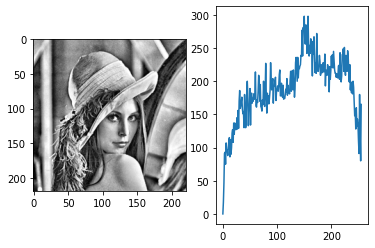

In [66]:
image = cv2.imread('data/lenna.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image_eq = cv2.equalizeHist(gray_image)

clahe = cv2.createCLAHE(clipLimit=4.0)
gray_image_clahe = clahe.apply(gray_image_eq)
hist_clahe = cv2.calcHist([gray_image_clahe], [0], None, [256], [0, 256])

plt.subplot(1,2,1)
plt.imshow(gray_image_clahe,cmap='gray')
plt.subplot(1,2,2)
plt.plot(hist_clahe)

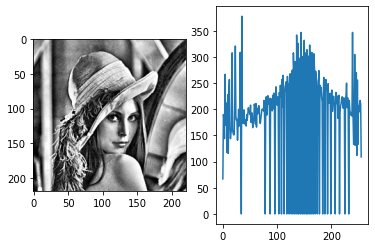

In [67]:
image = cv2.imread('data/lenna.png')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


clahe = cv2.createCLAHE(clipLimit=4.0)
gray_image_clahe = clahe.apply(gray_image)
gray_image_eq = cv2.equalizeHist(gray_image_clahe)
hist_eq = cv2.calcHist([gray_image_eq], [0], None, [256], [0, 256])

plt.subplot(1,2,1)
plt.imshow(gray_image_eq,cmap='gray')
plt.subplot(1,2,2)
plt.plot(hist_eq)

# Histogram comparison

corr: 0.3457234204243703
match: 0.4011130822829297


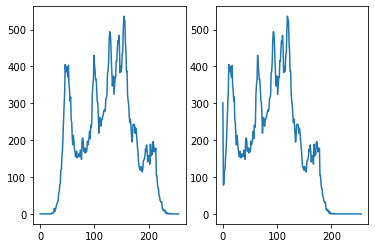

In [72]:
image = cv2.imread('data/lenna.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
M = np.ones(gray_image.shape, dtype="uint8") * 35
subtracted_image = cv2.subtract(gray_image, M)
h1 = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
h2 = cv2.calcHist([subtracted_image], [0], None, [256], [0, 256])
#correlation between the two histograms
corr=cv2.compareHist(h1, h2,cv2.HISTCMP_CORREL)
#This metric returns values in the range
#[0,1], where 0 is a perfect match and 1 no match at all.
bha=cv2.compareHist(h1, h2,cv2.HISTCMP_BHATTACHARYYA)

print('corr:',corr)
print('match:',bha)
plt.subplot(1,2,1)
plt.plot(h1)
plt.subplot(1,2,2)
plt.plot(h2)